# FINAL PROJECT

<h2>Created by</h2>
<h3>Krystian Potępa</h3>
<h3>136100</h3>

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import cx_Oracle

In [3]:
data = pd.read_csv('pokemon.csv', delimiter= ',')
df = pd.DataFrame(data, columns= ['Numer','Nazwa','Typ','HP','Atak','Obrona','SpAtk','SpObr','Speed','Generation','Legendary'])
print(df)

df.dtypes

     Numer                  Nazwa      Typ  HP  Atak  Obrona  SpAtk  SpObr  \
0        1              Bulbasaur    Grass  45    49      49     65     65   
1        2                Ivysaur    Grass  60    62      63     80     80   
2        3               Venusaur    Grass  80    82      83    100    100   
3        3  VenusaurMega Venusaur    Grass  80   100     123    122    120   
4        4             Charmander     Fire  39    52      43     60     50   
..     ...                    ...      ...  ..   ...     ...    ...    ...   
795    719                Diancie     Rock  50   100     150    100    150   
796    719    DiancieMega Diancie     Rock  50   160     110    160    110   
797    720    HoopaHoopa Confined  Psychic  80   110      60    150    130   
798    720     HoopaHoopa Unbound  Psychic  80   160      60    170    130   
799    721              Volcanion     Fire  80   110     120    130     90   

     Speed  Generation  Legendary  
0       45           1     

Numer          int64
Nazwa         object
Typ           object
HP             int64
Atak           int64
Obrona         int64
SpAtk          int64
SpObr          int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [3]:
lib_dir = r"C:\Users\KrystianPC\Desktop\plikiDLL" #Potrzebne biblioteki do cx_Oracle
#https://drive.google.com/file/d/1WjzlgHRjVw4CEvkIW0icZB5HnUpBGq1W/view?usp=sharing - do pobrania, bo nie mieszczą się na gicie
try:
    cx_Oracle.init_oracle_client(lib_dir=lib_dir)
except Exception as err:
    print("Error connecting: cx_Oracle.init_oracle_client()")
    print(err);
    sys.exit(1);


In [4]:
%run connection.ipynb

Łączenie z bazą


DatabaseError: ORA-12569: TNS:packet checksum failure

DatabaseError: ORA-12569: TNS:packet checksum failure

In [ ]:
#c.execute('select * from POKEMON')

In [ ]:
c.execute("BEGIN EXECUTE IMMEDIATE 'DROP TABLE POKEMON'; EXCEPTION WHEN OTHERS THEN NULL; END;")
print ('Stara tablica zostala usunieta')
#Usuwanie tabeli, jeżeli istnieje

In [ ]:
c.execute("Create TABLE pokemon(Numer int,Nazwa varchar(50),Typ varchar(50),HP int,Atak int,Obrona int,SpAtk int,SpObr int,Speed int,Generation int ,Legendary varchar(50))")
print ('Nowa tabela zostala utworzona')

In [ ]:
for i in range(len(df.Numer)):
     c.execute("Insert into POKEMON(Numer, Nazwa, Typ, HP ,Atak ,Obrona, SpAtk, SpObr, Speed, Generation, Legendary) values ("+str(df.iloc[i,0])+",'"+str(df.iloc[i,1])+"','"+str(df.iloc[i,2])+"',"+str(df.iloc[i,3])+","+str(df.iloc[i,4])+","+str(df.iloc[i,5])+","+str(df.iloc[i,6])+","+str(df.iloc[i,7])+","+str(df.iloc[i,8])+","+str(df.iloc[i,9])+",'"+str(df.iloc[i,10])+"')")
conn.commit()
    
print ('Dane zostaly zimportowane')

In [ ]:
c.execute("select * from POKEMON order by Numer")
for pokemons in c.fetchall():
        print(pokemons)

In [4]:
df.describe()

,Numer,HP,Atak,Obrona,SpAtk,SpObr,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
#Zapisywanie danych do pliku
query = "SELECT * FROM POKEMON"
zapis = pd.read_sql_query(query, conn)
zapis.to_csv("backup+"date.today()"+.csv", index=False)

SyntaxError: invalid syntax (<ipython-input-6-df83dcb0daca>, line 4)

In [10]:
#Regresja dla paru zmiennych
from sklearn import linear_model
from sklearn.model_selection import train_test_split
y = df['Atak']
x = df['Generation']

Wyraz wolny =  75.66012496889381
Wartość współczynnika x =  [1.00522754]
Determinacja R 2potęgi =  0.0026472400490883397


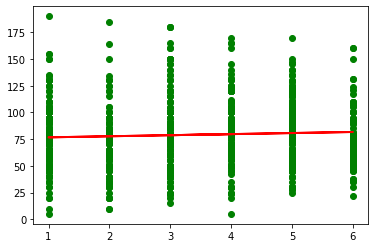

In [17]:
x=df.Generation.to_numpy().reshape((-1,1))
y=df.Atak.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(x,y)
prognoza = regr.predict(x_test)

plt.scatter(x,y, color='green')
plt.plot(x_test, prognoza, color='red', linewidth=2)
print('Wyraz wolny = ', regr.intercept_)
print('Wartość współczynnika x = ', regr.coef_)
print('Determinacja R 2potęgi = ', regr.score(x,y))

<h2>Zapytania do bazy, 6 polecenie</h2>

<h3>Tworzenie Tabeli</h3>
Create TABLE pokemon(Numer int primary key,Nazwa varchar(50),Typ varchar(50),HP int,Atak int ,Obrona int,SpAtk int ,SpObr int,Speed int ,Generation int ,Legendary varchar(50))

<h3>Usunięcie tabeli "Pokemon", jeżeli istnieje</h3>
BEGIN EXECUTE IMMEDIATE 'DROP TABLE POKEMON'; EXCEPTION WHEN OTHERS THEN NULL; END;

<h3>Archiwum danych</h3>
Create table archiwum( Numer int primary key,Nazwa varchar(50),Typ varchar(50),HP int,Atak int ,Obrona int,SpAtk int ,SpObr int,Speed int ,Generation int ,Legendary varchar(50), DzienArchiwizacji date);

create or replace trigger archiwum
AFTER DELETE ON POKEMON
FOR EACH ROW
BEGIN insert into archiwum values(:old.Numer, :old.Nazwa, :old.Typ, :old.HP, :old.Atak, :old.Obrona, :old.SpAtk, :old.SpObr, :old.Speed, :old.Generation, :old.Legendary, SYSDATE);
END



In [ ]:
c.close()
conn.close()